<a href="https://colab.research.google.com/github/Tom-Jung/Suanlab_example/blob/main/_6_%EC%B5%9C%EA%B7%BC%EC%A0%91_%EC%9D%B4%EC%9B%83(K_Nearest_Neighbor).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 최근접 이웃(K-Nearest Neighbor)

* 특별한 예측 모델 없이 가장 가까운 데이터 포인트를 기반으로 예측을 수행하는 방법
* 분류와 회귀 모두 지원

![k nearest neighbor](https://upload.wikimedia.org/wikipedia/commons/thumb/e/e7/KnnClassification.svg/220px-KnnClassification.svg.png)

In [1]:
import pandas as pd
import numpy as np
import multiprocessing
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

In [2]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.manifold import TSNE
from sklearn.datasets import load_iris, load_breast_cancer, load_wine
from sklearn.datasets import load_boston, fetch_california_housing
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline, Pipeline

## K 최근접 이웃 분류

* 입력 데이터 포인트와 가장 가까운 k개의 훈련 데이터 포인트가 출력
* k개의 데이터 포인트 중 가장 많은 클래스가 예측 결과

### 붓꽃 데이터

In [5]:
iris = load_iris()
print(iris.keys())
print(iris.DESCR)
# print(iris)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    peta

In [6]:
iris_df = pd.DataFrame(data=iris.data)
iris_df

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [7]:
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['Target'] = iris.target
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [8]:
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [9]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [10]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier()

In [11]:
print("학습 데이터 점수 : {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수 : {}".format(model.score(X_test, y_test)))

학습 데이터 점수 : 0.9666666666666667
평가 데이터 점수 : 0.9666666666666667


In [153]:
model = KNeighborsClassifier()
model.fit(X_train_scale, y_train)

KNeighborsClassifier()

In [154]:
print("학습 데이터 점수 : {}".format(model.score(X_train_scale, y_train)))
print("평가 데이터 점수 : {}".format(model.score(X_test_scale, y_test)))

학습 데이터 점수 : 0.9647887323943662
평가 데이터 점수 : 1.0


In [14]:
cross_validate(
    estimator=KNeighborsClassifier(),
    X=X,y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    1.5s finished


{'fit_time': array([0.00105572, 0.00113893, 0.00084019, 0.00083637, 0.00242543]),
 'score_time': array([0.002707  , 0.00251102, 0.00274372, 0.00242591, 0.0045495 ]),
 'test_score': array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])}

In [15]:
param_grid = [{'n_neighbors' : [3,5,7],
               'weights' : ['uniform', 'distance'],
               'algorithm' : ['ball_tree', 'kd_tree', 'brute']}]

In [16]:
gs = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid = param_grid,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

In [17]:
gs.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=2,
             param_grid=[{'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                          'n_neighbors': [3, 5, 7],
                          'weights': ['uniform', 'distance']}],
             verbose=True)

In [18]:
gs.best_estimator_

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=7)

In [19]:
print("GridSearchCV best score : {}".format(gs.best_score_))

GridSearchCV best score : 0.9800000000000001


In [20]:
def make_meshgrid(x,y,h=.02):
  x_min, x_max = x.min()-1, x.max()+1
  y_min, y_max = y.min()-1, y.max()+1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                              np. arange(y_min, y_max,h))
  
  return xx, yy

def plot_contours(clf, xx, yy, **params):
  Z=clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  out = plt.contour(xx,yy, Z, **params)

  return out


In [21]:
tsne = TSNE(n_components=2)
X_comp = tsne.fit_transform(X)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [22]:
iris_comp_df = pd.DataFrame(data=X_comp)
iris_comp_df['Target'] = y
iris_comp_df

,0,1,Target
0,-18.862659,-14.883557,0
1,-19.972324,-17.460701,0
2,-18.781792,-17.354876,0
3,-19.184221,-17.790724,0
4,-18.436064,-14.922309,0
...,...,...,...
145,5.996496,13.616274,2
146,5.226381,10.476044,2
147,5.815966,12.666902,2
148,4.091426,13.867798,2


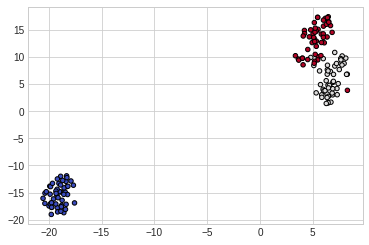

In [23]:
plt.scatter(X_comp[:,0],X_comp[:,1],c=y, cmap=plt.cm.coolwarm, s=20, edgecolor='k')

In [24]:
model = KNeighborsClassifier()
model.fit(X_comp,y)
predict = model.predict(X_comp)

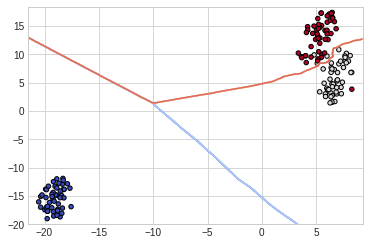

In [25]:
xx, yy = make_meshgrid(X_comp[:,0], X_comp[:,1])
plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_comp[:,0] ,X_comp[:,1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolor='k')

###와인 데이터

In [155]:
wine = load_wine()

In [156]:
X, y = wine.data, wine.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [157]:
wine_df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
wine_df['target'] = wine.target
wine_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [158]:
wine_train_df = pd.DataFrame(data=X_train, columns=wine.feature_names)
wine_train_df['target'] = y_train
wine_train_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,12.99,1.67,2.60,30.0,139.0,3.30,2.89,0.21,1.96,3.35,1.31,3.50,985.0,1
1,14.30,1.92,2.72,20.0,120.0,2.80,3.14,0.33,1.97,6.20,1.07,2.65,1280.0,0
2,14.06,1.63,2.28,16.0,126.0,3.00,3.17,0.24,2.10,5.65,1.09,3.71,780.0,0
3,12.67,0.98,2.24,18.0,99.0,2.20,1.94,0.30,1.46,2.62,1.23,3.16,450.0,1
4,13.48,1.67,2.64,22.5,89.0,2.60,1.10,0.52,2.29,11.75,0.57,1.78,620.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,13.16,3.57,2.15,21.0,102.0,1.50,0.55,0.43,1.30,4.00,0.60,1.68,830.0,2
138,14.22,3.99,2.51,13.2,128.0,3.00,3.04,0.20,2.08,5.10,0.89,3.53,760.0,0
139,12.29,1.41,1.98,16.0,85.0,2.55,2.50,0.29,1.77,2.90,1.23,2.74,428.0,1
140,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0,0


In [159]:
wine_test_df = pd.DataFrame(data=X_test, columns=wine.feature_names)
wine_test_df['target'] = y_test
wine_test_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,12.08,1.13,2.51,24.0,78.0,2.00,1.58,0.40,1.40,2.20,1.31,2.72,630.0,1
1,11.61,1.35,2.70,20.0,94.0,2.74,2.92,0.29,2.49,2.65,0.96,3.26,680.0,1
2,13.77,1.90,2.68,17.1,115.0,3.00,2.79,0.39,1.68,6.30,1.13,2.93,1375.0,0
3,13.94,1.73,2.27,17.4,108.0,2.88,3.54,0.32,2.08,8.90,1.12,3.10,1260.0,0
4,13.83,1.57,2.62,20.0,115.0,2.95,3.40,0.40,1.72,6.60,1.13,2.57,1130.0,0
5,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2
6,14.21,4.04,2.44,18.9,111.0,2.85,2.65,0.30,1.25,5.24,0.87,3.33,1080.0,0
7,11.62,1.99,2.28,18.0,98.0,3.02,2.26,0.17,1.35,3.25,1.16,2.96,345.0,1
8,13.49,1.66,2.24,24.0,87.0,1.88,1.84,0.27,1.03,3.74,0.98,2.78,472.0,1
9,13.58,2.58,2.69,24.5,105.0,1.55,0.84,0.39,1.54,8.66,0.74,1.80,750.0,2


In [160]:
scaler = StandardScaler()
X_train_scale=scaler.fit_transform(X_train)
X_test_scale=scaler.transform(X_test)

In [161]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier()

In [162]:
print("학습 데이터 점수 : {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수 : {}".format(model.score(X_test, y_test)))

학습 데이터 점수 : 0.7605633802816901
평가 데이터 점수 : 0.7777777777777778


In [163]:
model = KNeighborsClassifier()
model.fit(X_train_scale, y_train)

KNeighborsClassifier()

In [164]:
print("학습 데이터 점수 : {}".format(model.score(X_train_scale, y_train)))
print("평가 데이터 점수 : {}".format(model.score(X_test_scale, y_test)))

학습 데이터 점수 : 0.9647887323943662
평가 데이터 점수 : 1.0


In [165]:
estimator = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier()
)

In [166]:
cross_validate(
    estimator=estimator,
    X=X, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.00241971, 0.00212526, 0.00166178, 0.00105953, 0.00109291]),
 'score_time': array([0.00303173, 0.00489855, 0.00281143, 0.00506186, 0.00178862]),
 'test_score': array([0.94444444, 0.94444444, 0.97222222, 1.        , 0.88571429])}

In [103]:
pipe = Pipeline(
    [('scaler', StandardScaler()),
     ('model', KNeighborsClassifier())]
)

In [167]:
param_grid = [{'model__n_neighbors' : [3,5,7],
                     'model__weights' : ['uniform', 'distance'],
                     'model__algorithm' : ['ball_tree', 'kd_tree', 'brute']}]

In [168]:
gs = GridSearchCV(
      estimator=pipe,
      param_grid=param_grid,
      n_jobs=multiprocessing.cpu_count(),
      verbose=True 
)

In [169]:
gs.fit(X,y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', KNeighborsClassifier())]),
             n_jobs=2,
             param_grid=[{'model__algorithm': ['ball_tree', 'kd_tree', 'brute'],
                          'model__n_neighbors': [3, 5, 7],
                          'model__weights': ['uniform', 'distance']}],
             verbose=True)

In [170]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 KNeighborsClassifier(algorithm='ball_tree', n_neighbors=7))])

In [171]:
print('GridSearchCV best score : {}'.format(gs.best_score_))

GridSearchCV best score : 0.9665079365079364


In [172]:
tsne = TSNE(n_components=2)
X_comp = tsne.fit_transform(X)


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [173]:
wine_comp_df =pd.DataFrame(data=X_comp)
wine_comp_df['Target']=y
wine_comp_df

,0,1,Target
0,-4.657912,-10.731844,0
1,-4.540924,-10.375760,0
2,-6.237667,-12.312510,0
3,-7.649573,-14.763351,0
4,-0.087287,-3.436133,0
...,...,...,...
173,0.275434,-3.684804,2
174,-0.017363,-3.995504,2
175,-1.727577,-5.958600,2
176,-1.653404,-6.216324,2


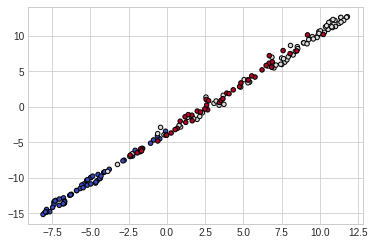

In [174]:
plt.scatter(X_comp[:,0], X_comp[:,1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolor='k')

In [176]:
model = KNeighborsClassifier()
model.fit(X_comp,y)
predict = model.predict(X_comp)

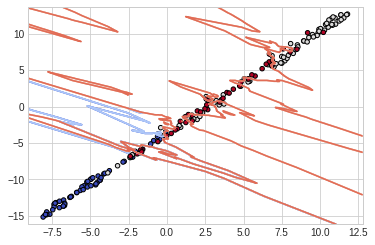

In [177]:
xx, yy = make_meshgrid(X_comp[:,0], X_comp[:,1])
plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_comp[:,0], X_comp[:,1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolor='k')

## k 최근접 이웃 회귀

* k 최근접 이웃 분류와 마찬가지로 예측에 이웃 데이터 포인트 사용
* 이웃 데이터 포인트의 평균이 예측 결과

### 보스턴 주택 가격 데이터

In [7]:
boston = load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [8]:
boston_df = pd.DataFrame(data=boston.data, columns=boston.feature_names)
boston_df['target'] = boston.target
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [10]:
X, y = boston.data, boston.target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [11]:
boston_train_df = pd.DataFrame(data=X_train, columns=boston.feature_names)
boston_train_df['target'] =y_train
boston_train_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.29090,0.0,21.89,0.0,0.624,6.174,93.6,1.6119,4.0,437.0,21.2,388.08,24.16,14.0
1,0.52058,0.0,6.20,1.0,0.507,6.631,76.5,4.1480,8.0,307.0,17.4,388.45,9.54,25.1
2,0.14103,0.0,13.92,0.0,0.437,5.790,58.0,6.3200,4.0,289.0,16.0,396.90,15.84,20.3
3,1.41385,0.0,19.58,1.0,0.871,6.129,96.0,1.7494,5.0,403.0,14.7,321.02,15.12,17.0
4,0.24522,0.0,9.90,0.0,0.544,5.782,71.7,4.0317,4.0,304.0,18.4,396.90,15.94,19.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,7.52601,0.0,18.10,0.0,0.713,6.417,98.3,2.1850,24.0,666.0,20.2,304.21,19.31,13.0
400,0.03041,0.0,5.19,0.0,0.515,5.895,59.6,5.6150,5.0,224.0,20.2,394.81,10.56,18.5
401,0.10793,0.0,8.56,0.0,0.520,6.195,54.4,2.7778,5.0,384.0,20.9,393.49,13.00,21.7
402,0.22212,0.0,10.01,0.0,0.547,6.092,95.4,2.5480,6.0,432.0,17.8,396.90,17.09,18.7


In [12]:
boston_test_df = pd.DataFrame(data=X_test, columns=boston.feature_names)
boston_test_df['target'] =y_test
boston_test_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.04741,0.0,11.93,0.0,0.5730,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9
1,0.17004,12.5,7.87,0.0,0.5240,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9
2,2.33099,0.0,19.58,0.0,0.8710,5.186,93.8,1.5296,5.0,403.0,14.7,356.99,28.32,17.8
3,0.08244,30.0,4.93,0.0,0.4280,6.481,18.5,6.1899,6.0,300.0,16.6,379.41,6.36,23.7
4,0.17446,0.0,10.59,1.0,0.4890,5.960,92.1,3.8771,4.0,277.0,18.6,393.25,17.27,21.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,0.03584,80.0,3.37,0.0,0.3980,6.290,17.8,6.6115,4.0,337.0,16.1,396.90,4.67,23.5
98,0.03578,20.0,3.33,0.0,0.4429,7.820,64.5,4.6947,5.0,216.0,14.9,387.31,3.76,45.4
99,0.29819,0.0,6.20,0.0,0.5040,7.686,17.0,3.3751,8.0,307.0,17.4,377.51,3.92,46.7
100,14.05070,0.0,18.10,0.0,0.5970,6.657,100.0,1.5275,24.0,666.0,20.2,35.05,21.22,17.2


In [13]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [18]:
model = KNeighborsRegressor()
model.fit(X_train, y_train)

KNeighborsRegressor()

In [19]:
print("학습 데이터 점수 : {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수 : {}".format(model.score(X_test, y_test)))

학습 데이터 점수 : 0.6895812416254352
평가 데이터 점수 : 0.5376801809278562


In [20]:
model =KNeighborsRegressor()
model.fit(X_train_scale, y_train)

KNeighborsRegressor()

In [21]:
print("학습 데이터 점수 : {}".format(model.score(X_train_scale, y_train)))
print("평가 데이터 점수 : {}".format(model.score(X_test_scale, y_test)))

학습 데이터 점수 : 0.8376551725407477
평가 데이터 점수 : 0.7496702873718871


In [22]:
estimator = make_pipeline(
    StandardScaler(),
    KNeighborsRegressor()
)

In [23]:
cross_validate(
    estimator=estimator,
    X=X, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    1.0s finished


{'fit_time': array([0.00269556, 0.00296617, 0.00234294, 0.00211096, 0.00208712]),
 'score_time': array([0.00300646, 0.00292277, 0.00254798, 0.00234771, 0.00208974]),
 'test_score': array([0.56089547, 0.61917359, 0.48661916, 0.46986886, 0.23133037])}

In [24]:
pipe = Pipeline(
    [('scaler', StandardScaler()),
     ('model', KNeighborsRegressor())]
)

In [25]:
param_grid = [{'model__n_neighbors' : [3,5,7],
                     'model__weights' : ['uniform', 'distance'],
                     'model__algorithm' : ['ball_tree', 'kd_tree', 'brute']}]

In [26]:
gs = GridSearchCV(
      estimator=pipe,
      param_grid=param_grid,
      n_jobs=multiprocessing.cpu_count(),
      verbose=True 
)

In [27]:
gs.fit(X,y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', KNeighborsRegressor())]),
             n_jobs=2,
             param_grid=[{'model__algorithm': ['ball_tree', 'kd_tree', 'brute'],
                          'model__n_neighbors': [3, 5, 7],
                          'model__weights': ['uniform', 'distance']}],
             verbose=True)

In [28]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 KNeighborsRegressor(algorithm='ball_tree', n_neighbors=7,
                                     weights='distance'))])

In [29]:
print('GridSearchCV best score : {}'.format(gs.best_score_))

GridSearchCV best score : 0.4973060611762845


In [37]:
tsne = TSNE(n_components=1)
X_comp = tsne.fit_transform(X)


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [38]:
boston_comp_df =pd.DataFrame(data=X_comp)
boston_comp_df['Target']=y
boston_comp_df

,0,Target
0,-3.849708,24.0
1,16.574287,21.6
2,12.860259,34.7
3,13.793230,33.4
4,14.059558,36.2
...,...,...
501,-1.022824,22.4
502,-0.371519,20.6
503,0.424877,23.9
504,0.378545,22.0


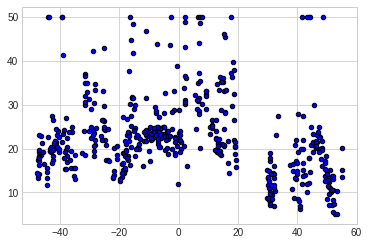

In [39]:
plt.scatter(X_comp, y,  c='b', cmap=plt.cm.coolwarm, s=20, edgecolor='k')

In [41]:
model = KNeighborsRegressor()
model.fit(X_comp,y)
predict = model.predict(X_comp)

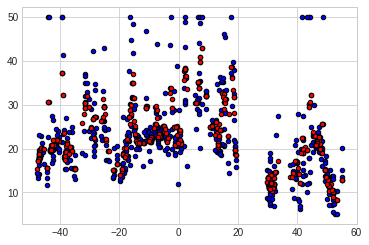

In [43]:
plt.scatter(X_comp, y,  c='b', cmap=plt.cm.coolwarm, s=20, edgecolor='k')
plt.scatter(X_comp, predict,  c='r', cmap=plt.cm.coolwarm, s=20, edgecolor='k')

### 캘리포니아 주택 가격 데이터

In [3]:
california = fetch_california_housing()

In [4]:
california_df = pd.DataFrame(data=california.data, columns=california.feature_names)
california_df['target'] = california.target
california_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [6]:
X, y = california.data, california.target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [7]:
california_train_df = pd.DataFrame(data=X_train, columns=california.feature_names)
california_train_df['target'] =y_train
california_train_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,2.9375,44.0,4.532847,0.985401,811.0,2.959854,33.98,-118.30,0.952
1,5.8336,36.0,7.460000,0.960000,414.0,2.760000,38.60,-121.37,2.833
2,3.0890,18.0,3.997126,1.081609,2803.0,1.610920,38.58,-121.41,1.414
3,2.8818,50.0,5.202614,1.076253,1241.0,2.703704,34.10,-117.77,1.672
4,3.5313,36.0,5.026266,1.028143,1605.0,3.011257,34.10,-118.08,2.132
...,...,...,...,...,...,...,...,...,...
16507,3.6694,17.0,5.098000,1.192000,1169.0,2.338000,38.03,-121.63,2.094
16508,3.1250,34.0,4.923077,0.987981,1456.0,3.500000,34.10,-117.89,1.686
16509,3.1667,14.0,4.784387,1.081784,737.0,2.739777,36.31,-119.78,1.264
16510,1.0649,43.0,3.564626,1.061224,1320.0,4.489796,38.56,-121.51,1.375


In [8]:
california_test_df = pd.DataFrame(data=X_test, columns=california.feature_names)
california_test_df['target'] =y_test
california_test_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.1714,23.0,7.883598,0.957672,1208.0,3.195767,34.24,-118.56,5.00001
1,7.7785,13.0,7.969697,1.025974,833.0,3.606061,34.25,-118.78,4.04700
2,4.5221,16.0,6.125000,1.159091,667.0,2.526515,37.22,-121.77,1.91100
3,1.8125,25.0,3.782443,1.038168,941.0,3.591603,36.76,-120.38,0.58000
4,3.6422,19.0,4.344203,0.909420,730.0,2.644928,33.82,-117.96,2.09400
...,...,...,...,...,...,...,...,...,...
4123,4.8583,28.0,5.983333,0.970370,1665.0,3.083333,34.28,-119.19,2.24200
4124,1.7227,52.0,4.954023,1.011494,922.0,2.649425,37.50,-120.85,0.85700
4125,3.3687,47.0,4.683333,1.077778,800.0,4.444444,34.28,-118.44,1.51700
4126,6.3223,5.0,8.579225,1.125000,1947.0,3.427817,33.94,-117.14,2.23200


In [9]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [10]:
model = KNeighborsRegressor()
model.fit(X_train, y_train)

KNeighborsRegressor()

In [11]:
print("학습 데이터 점수 : {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수 : {}".format(model.score(X_test, y_test)))

학습 데이터 점수 : 0.4511353489833225
평가 데이터 점수 : 0.1350738397721346


In [12]:
model =KNeighborsRegressor()
model.fit(X_train_scale, y_train)

KNeighborsRegressor()

In [13]:
print("학습 데이터 점수 : {}".format(model.score(X_train_scale, y_train)))
print("평가 데이터 점수 : {}".format(model.score(X_test_scale, y_test)))

학습 데이터 점수 : 0.8066870077590862
평가 데이터 점수 : 0.7054036918053843


In [14]:
estimator = make_pipeline(
    StandardScaler(),
    KNeighborsRegressor()
)

In [15]:
cross_validate(
    estimator=estimator,
    X=X, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    1.9s finished


{'fit_time': array([0.03170633, 0.03199387, 0.02985477, 0.02916455, 0.03034449]),
 'score_time': array([0.43658829, 0.36279917, 0.40469933, 0.44709039, 0.28399467]),
 'test_score': array([0.47879396, 0.4760079 , 0.57624554, 0.50259828, 0.57228584])}

In [16]:
pipe = Pipeline(
    [('scaler', StandardScaler()),
     ('model', KNeighborsRegressor())]
)

In [17]:
param_grid = [{'model__n_neighbors' : [3,5,7],
                     'model__weights' : ['uniform', 'distance'],
                     'model__algorithm' : ['ball_tree', 'kd_tree', 'brute']}]

In [18]:
gs = GridSearchCV(
      estimator=pipe,
      param_grid=param_grid,
      n_jobs=multiprocessing.cpu_count(),
      verbose=True 
)

In [19]:
gs.fit(X,y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', KNeighborsRegressor())]),
             n_jobs=2,
             param_grid=[{'model__algorithm': ['ball_tree', 'kd_tree', 'brute'],
                          'model__n_neighbors': [3, 5, 7],
                          'model__weights': ['uniform', 'distance']}],
             verbose=True)

In [21]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 KNeighborsRegressor(algorithm='ball_tree', n_neighbors=7,
                                     weights='distance'))])

In [22]:
print('GridSearchCV best score : {}'.format(gs.best_score_))

GridSearchCV best score : 0.5376515274379832


In [63]:
tsne = TSNE(n_components=1)
X_comp = tsne.fit_transform(X)


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [24]:
california_comp_df =pd.DataFrame(data=X_comp)
california_comp_df['Target']=y
california_comp_df

,0,Target
0,30.312677,4.526
1,74.043640,3.585
2,21.335213,3.521
3,16.851818,3.413
4,6.896325,3.422
...,...,...
20635,-61.294304,0.781
20636,28.946463,0.771
20637,-46.402782,0.923
20638,-35.388718,0.847


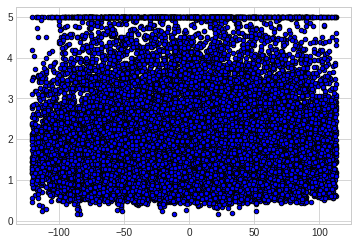

In [25]:
plt.scatter(X_comp, y,  c='b', cmap=plt.cm.coolwarm, s=20, edgecolor='k')

In [26]:
model = KNeighborsRegressor()
model.fit(X_comp,y)
predict = model.predict(X_comp)

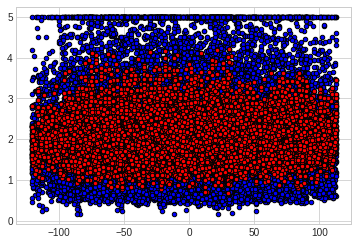

In [27]:
plt.scatter(X_comp, y,  c='b', cmap=plt.cm.coolwarm, s=20, edgecolor='k')
plt.scatter(X_comp, predict,  c='r', cmap=plt.cm.coolwarm, s=20, edgecolor='k')